In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def subplots():
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax


def plot45(g, xmin, xmax, x0, num_arrows=6, var='x'):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw,
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='g')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args)
            ax.plot((x, x), (0, x), 'k', ls='dotted')

        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i)))

        x = g(x)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
        ax.plot((x, x), (0, x), 'k', ls='dotted')

    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show()

def ts_plot(g, xmin, xmax, x0, ts_length=6, var='x'):
    fig, ax = subplots()
    ax.set_ylim(xmin, xmax)
    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'${}_t$'.format(var), fontsize=14)
    x = np.empty(ts_length)
    x[0] = x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    ax.plot(range(ts_length),
            x,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'${}_t$'.format(var))
    ax.legend(loc='best', fontsize=14)
    ax.set_xticks(range(ts_length))
    plt.show()

In [3]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4

In [4]:
def g(k):
    return A * s * k**alpha + (1 - delta) * k

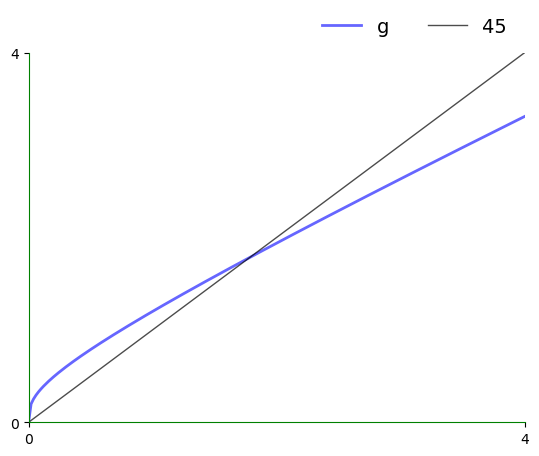

In [5]:
xmin, xmax = 0, 4  # Suitable plotting region.

plot45(g, xmin, xmax, 0, num_arrows=0)

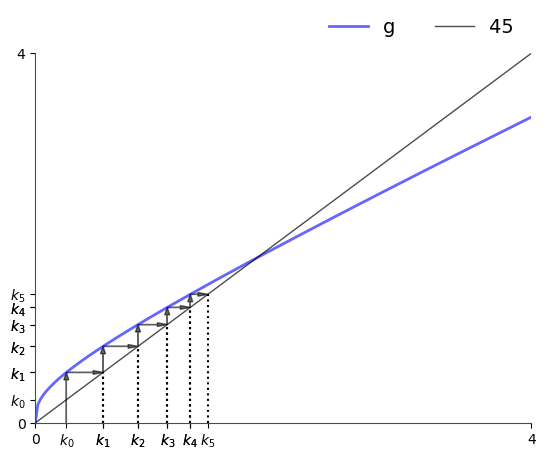

In [6]:
k0 = 0.25

plot45(g, xmin, xmax, k0, num_arrows=5, var='k')

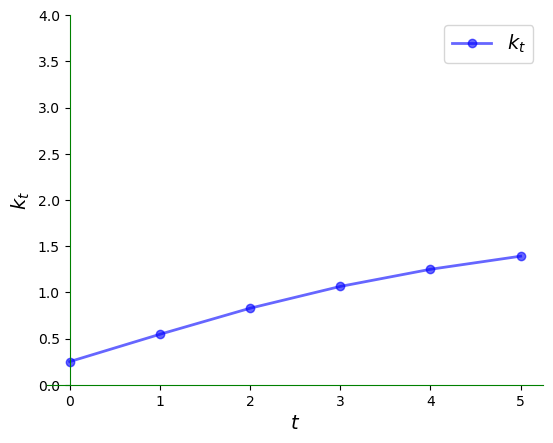

In [7]:
ts_plot(g, xmin, xmax, k0, var='k')

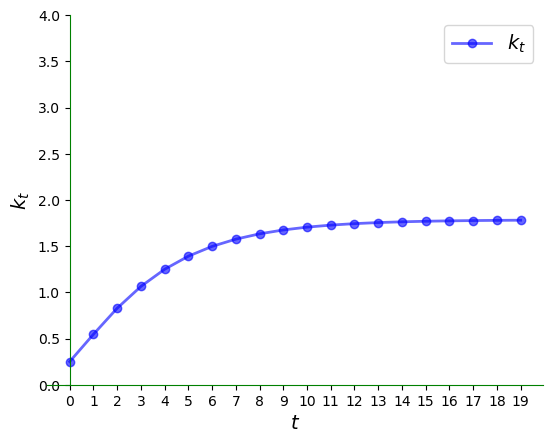

In [8]:
ts_plot(g, xmin, xmax, k0, ts_length=20, var='k')

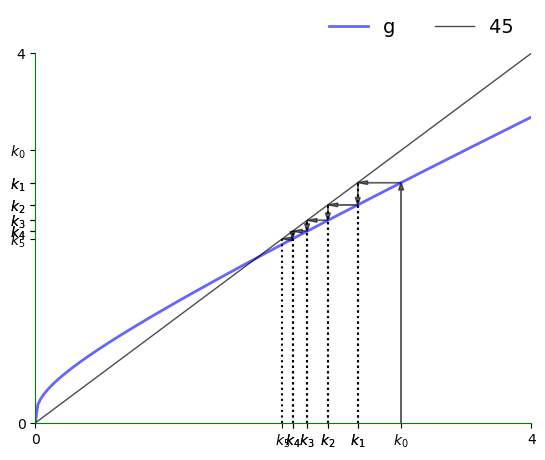

In [9]:
k0 = 2.95

plot45(g, xmin, xmax, k0, num_arrows=5, var='k')

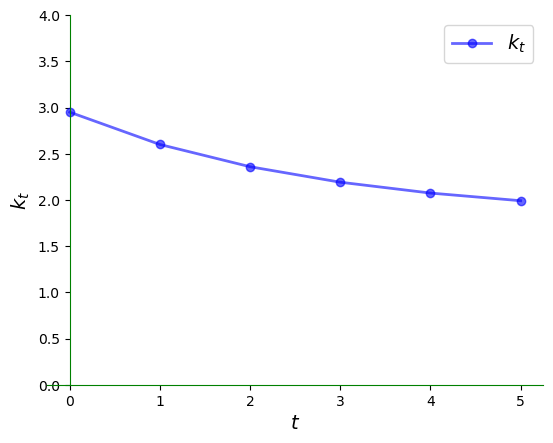

In [10]:
ts_plot(g, xmin, xmax, k0, var='k')

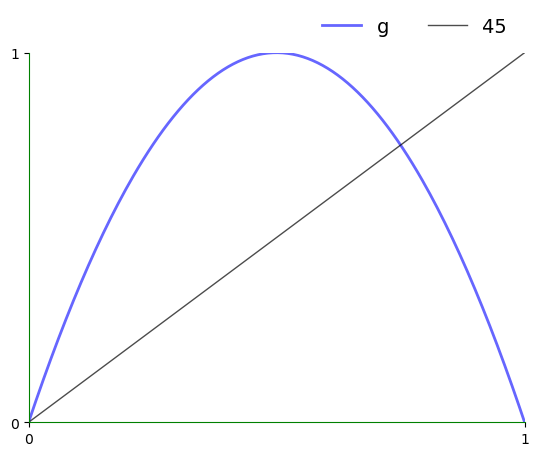

In [11]:
xmin, xmax = 0, 1
g = lambda x: 4 * x * (1 - x)

x0 = 0.3
plot45(g, xmin, xmax, x0, num_arrows=0)

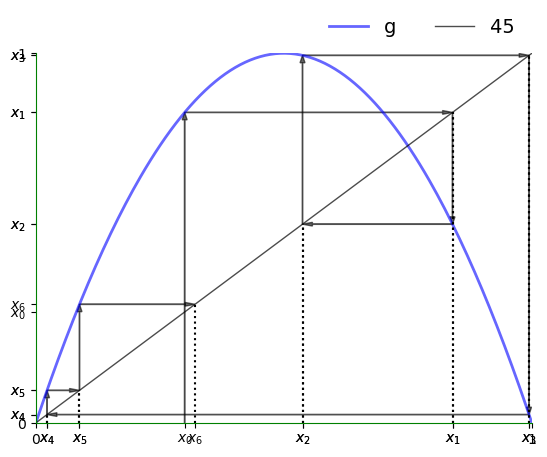

In [12]:
plot45(g, xmin, xmax, x0, num_arrows=6)

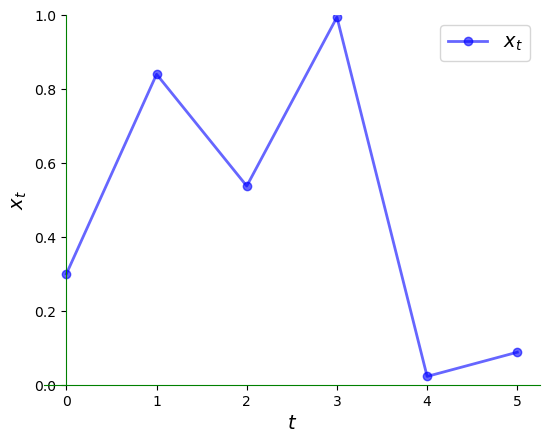

In [13]:
ts_plot(g, xmin, xmax, x0, ts_length=6)

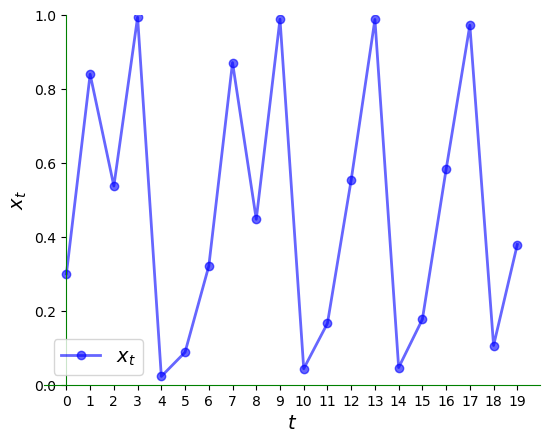

In [14]:
ts_plot(g, xmin, xmax, x0, ts_length=20)

In [15]:
a, b = 0.5, 1
xmin, xmax = -1, 3
g = lambda x: a * x + b

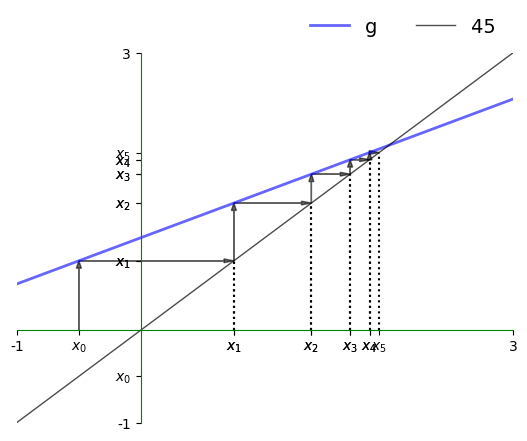

In [16]:
x0 = -0.5
plot45(g, xmin, xmax, x0, num_arrows=5)

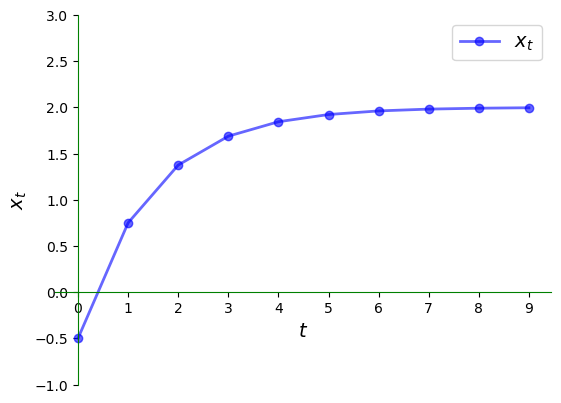

In [17]:
ts_plot(g, xmin, xmax, x0, ts_length=10)

In [18]:
a, b = -0.5, 1
xmin, xmax = -1, 3
g = lambda x: a * x + b

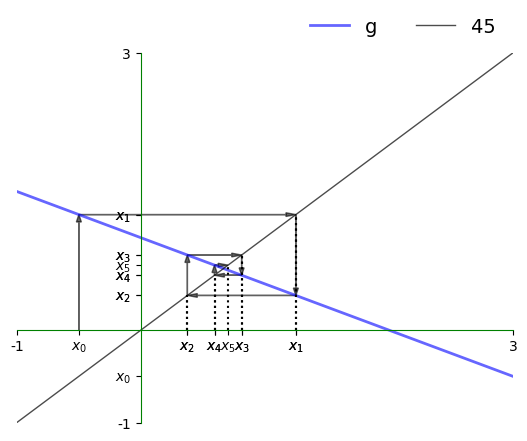

In [19]:
x0 = -0.5
plot45(g, xmin, xmax, x0, num_arrows=5)

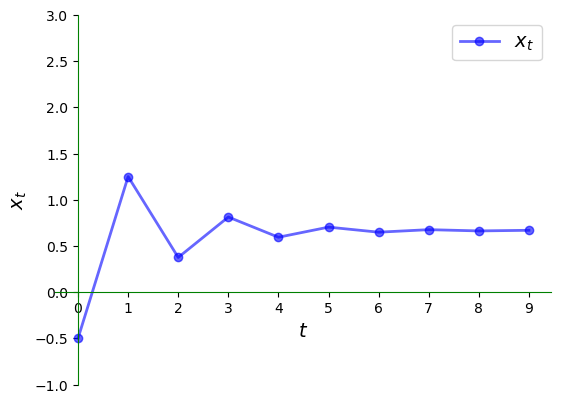

In [20]:
ts_plot(g, xmin, xmax, x0, ts_length=10)